
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - Regression <br>
<font color=696880 size=4>
Mahan Bayhaghi & Arash Ziyaei Razban


____

## Personal Data

In [1]:
# please fill in your student number and name
student_number = ''
Name = 'Emadeddin'
Last_Name = 'Rostamian'

In this notebook, we will implement regression methods. We will start from simple Linear Regression and make our way towards more complicated regressors as well.

##Libraries

You are not allowed to use sklearn ready regression methods.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Linear and Polynomieal Regression (60 points)


### Linear Regression (10 points)


Linear regression assumes a linear relationship between the input features and the output. The model predicts $ y $ using the equation:

$$
y = \mathbf{Xw} + b
$$

Here:
- $ \mathbf{X} $: The matrix of input features.
- $ \mathbf{w} $: The weight vector (parameters).
- $ b $: The bias term.
- $ y $: The predicted output.

The objective is to find $ \mathbf{w} $ and $ b $ that minimize the error between predicted and actual values. The error is typically measured using the **Mean Squared Error (MSE):**

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$


The optimal solution for $ \mathbf{w} $ and $ b $ can be computed directly using the closed-form equation:

$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

Where:
- $ \mathbf{X}^T $: Transpose of the feature matrix.
- $ (\mathbf{X}^T \mathbf{X})^{-1} $: Inverse of the Gram matrix.

For simplicity, $ b $ (bias) can be incorporated into $ \mathbf{X} $ by adding a column of ones.

We implement linear regression from scratch using a custom class `LinearRegressor`:

1. **Initialization:** The class stores model weights.
2. **Fitting the Model:** The `fit` method computes weights using the closed-form solution.
3. **Prediction:** The `predict` method uses the weights to make predictions for new data.


In [3]:

class LinearRegressor:
    def __init__(self):
        """
        Initialize the PolynomialRegressor.
        The model will learn the parameters (weights and bias) using linear regression.
        """
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Fits the linear regression model using the closed-form solution.

        Args:
        - X (ndarray): Input features of shape (n_samples, n_features).
        - y (ndarray): Target values of shape (n_samples,).
        """
        X = np.c_[np.ones(X.shape[0]), X]
        w = np.linalg.pinv(X.T @ X) @ X.T @ y
        self.weights = w[1:]
        self.bias = w[0]

    def predict(self, X):
        """
        Predicts target values using the fitted model.

        Args:
        - X (ndarray): Input features of shape (n_samples, n_features).

        Returns:
        - ndarray: Predicted values of shape (n_samples,).
        """
        return  X @ self.weights + self.bias

In this section, generate a synthetic linear dataset and utilize the implemented LinearRegressor to fit and evaluate it. Your calculated weights and real weights must be similar:

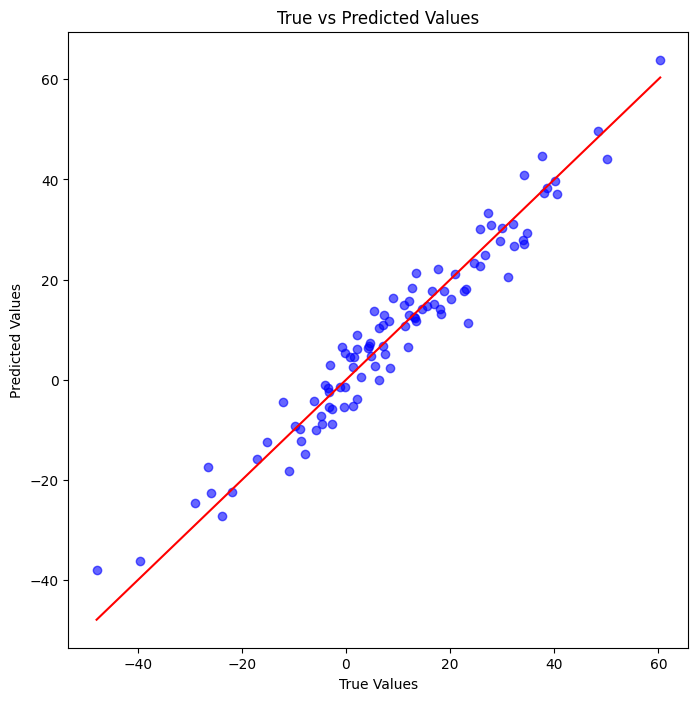

True weights (w): [7 4 8 5 7 3 7 8 5 4]
Estimated weights: [7.06293114 4.2995638  8.94891492 4.48428803 7.89531869 3.34836775
 7.30927683 8.33706719 3.77990236 3.81534172]
True bias (b): 8
Estimated bias: 8.101930592617181


In [4]:
np.random.seed(42)
samples = 100
features = 10
w = np.random.randint(1,10, size = (features,1))
b = np.random.randint(1,10)
#TODO: Generate a synthetic dataset
X = np.random.normal(0, 1, size = (samples,features))
y = X @ w + b + np.random.normal(0, 5, size = (samples,1))
y = y.flatten()
#TODO: Initialize and train the model
model = LinearRegressor()
model.fit(X,y)
#TODO: Make predictions
yhat = model.predict(X)
#TODO: Visualize the results
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y, yhat, alpha=0.6, color="blue")
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r-')
ax.set_xlabel("True Values")
ax.set_ylabel("Predicted Values")
ax.set_title("True vs Predicted Values")
plt.show()
#TODO: Display weights
print(f"True weights (w): {w.flatten()}")
print(f"Estimated weights: {model.weights}")
print(f"True bias (b): {b}")
print(f"Estimated bias: {model.bias}")

### Polynomial Regression (25 points)


Polynomial Regression is an extension of Linear Regression that models the relationship between the dependent and independent variables as an nth-degree polynomial.

Given the features \(X\), polynomial regression tries to fit a model of the form:

$$
y = w_0 + w_1 X + w_2 X^2 + w_3 X^3 + \dots + w_n X^n
$$

Where:
- $X$ is the input feature.
- $w_0, w_1, \dots, w_n$ are the weights (coefficients) to be learned.
- $n$ is the degree of the polynomial.

To fit this model, we can use the same closed-form solution as in linear regression, but now the features include powers of $X$.


In [64]:

class PolynomialRegressor:
    def __init__(self, degree=2):
        """
        Initialize the PolynomialRegressor.

        Args:
        - degree (int): The degree of the polynomial to fit.
        """
        self.degree = degree
        self.weights = None
    def fit(self, X, y):
        """
        Fits the polynomial regression model using the closed-form solution.

        Args:
        - X (ndarray): Input features of shape (n_samples, 1).
        - y (ndarray): Target values of shape (n_samples,).
        """
        Phi = np.zeros((X.shape[0], self.degree + 1))
        for i in range(self.degree + 1):
            Phi[:, i] = X.flatten() ** i
        self.weights = np.linalg.pinv(Phi.T @ Phi) @ Phi.T @ y
    def predict(self, X):
        """
        Predicts target values using the fitted polynomial regression model.

        Args:
        - X (ndarray): Input features of shape (n_samples, 1).

        Returns:
        - ndarray: Predicted values of shape (n_samples,).
        """
        Phi = np.zeros((X.shape[0], self.degree + 1))
        for i in range(self.degree + 1):
            Phi[:, i] = X.flatten() ** i
        return  Phi @ self.weights

Let's create a sample dataset of size 100 from following formula:

$$
y = x^4 - 4x^3 + 16 x + 4ϵ \ \ \ , \ \ \ x \in [-2, 2]
$$

where $\epsilon$ represents noise drawn from a $\mathcal{N}(0, 1)$ distribution.

The dataset will be split into 80% training data and 20% test data. Next, visualize the fitted polynomial curves for degrees ranging from 3 to 11. Additionally, compute and display the RMSE for both the training and test sets:

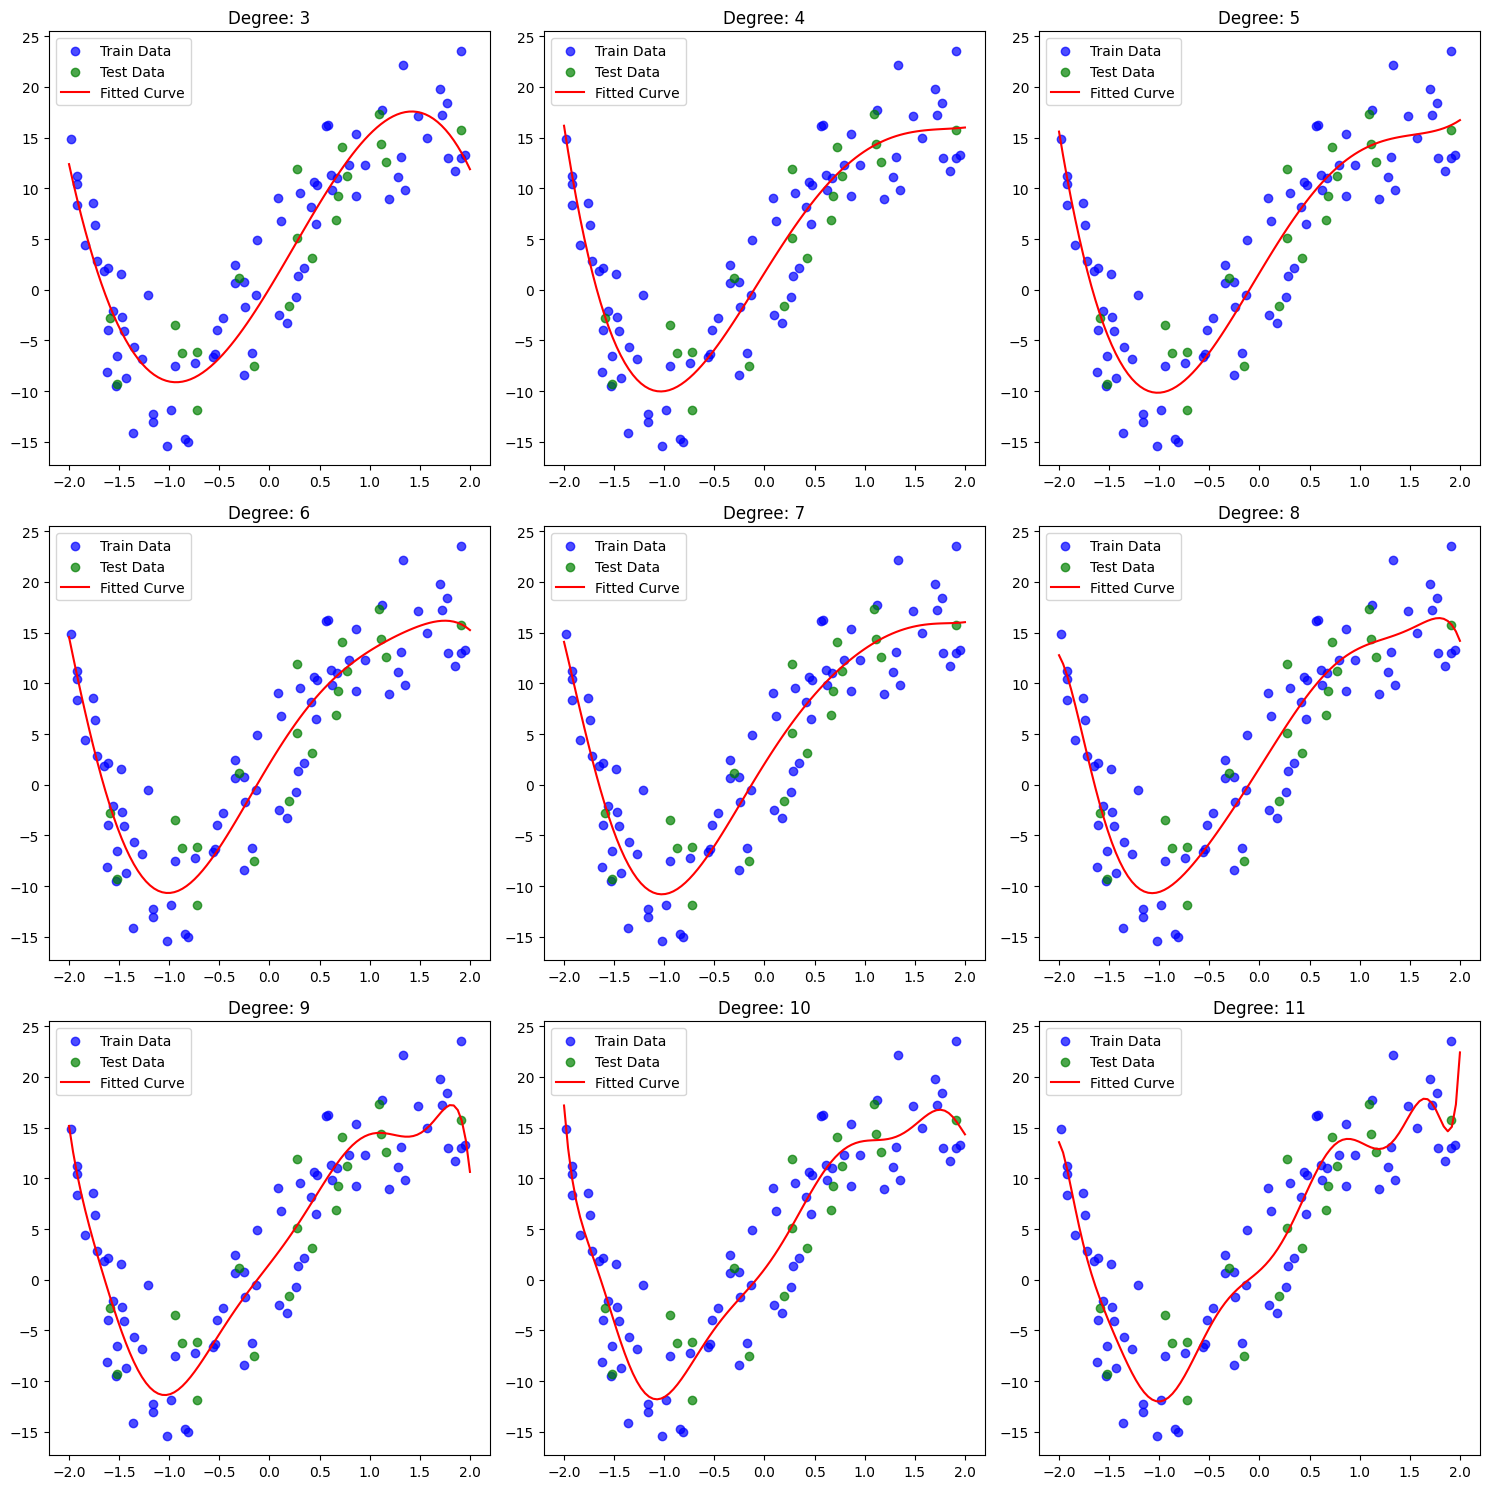

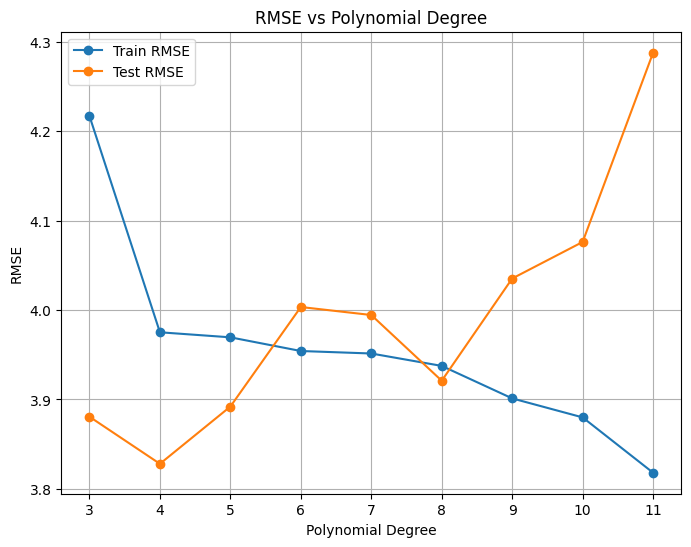

In [96]:
np.random.seed(0)
samples = 100
X = np.random.uniform(-2, 2, 100)
y = X ** 4 - 4 * X ** 3 + 16 * X + 4 * np.random.normal(0, 1, size = samples)
y = y.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#TODO: train polynomial regression and visualize the RMSE
RMSE_train = np.zeros(9)
RMSE_test = np.zeros(9)
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.ravel()

for i in range(3,12):
  model = PolynomialRegressor(degree = i)
  model.fit(X_train,y_train)
  yhat_train = model.predict(X_train)
  yhat_test = model.predict(X_test)
  RMSE_train[i-3] = np.sqrt(mean_squared_error(y_train, yhat_train))
  RMSE_test[i-3] = np.sqrt(mean_squared_error(y_test, yhat_test))

  x_range = np.linspace(-2, 2, 100).reshape(-1, 1)
  y_range = model.predict(x_range)
  axs[i-3].scatter(X_train, y_train, color="blue", alpha=0.7, label="Train Data")
  axs[i-3].scatter(X_test, y_test, color="green", alpha=0.7, label="Test Data")
  axs[i-3].plot(x_range, y_range, color="red", label="Fitted Curve")
  axs[i-3].set_title(f"Degree: {i}")
  axs[i-3].legend()

fig.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
degrees = np.arange(3, 12)
plt.plot(degrees, RMSE_train, label="Train RMSE", marker='o')
plt.plot(degrees, RMSE_test, label="Test RMSE", marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.title("RMSE vs Polynomial Degree")
plt.legend()
plt.grid()
plt.show()

**Does this RMSE plot confirm your previous knowledge of the bias-variance tradeoff?**  

**Ans:** As the degree increases, the test error rises while the training error declines, indicating a clear case of overfitting at higher degrees. This means that complex models have low bias but struggle to generalize due to high variance.  


**Could you explain the reason behind the change in RMSE behavior after a certain polynomial degree?**  

**Ans:** As I mentioned above, higher degrees allow the model to fit the training data better, which means it also learns from noisy samples. This weakens the model's generalization, resulting in a high RMSE on the test data.  


### Regularization (25 points)

Polynomial Regression can be enhanced with **regularization** to reduce the risk of overfitting, especially when working with high-degree polynomials. Two common regularization techniques are **Ridge Regression** and **Lasso Regression**, which modify the cost function to penalize large coefficients.

1. **Ridge Regression (L2 Regularization)**:
   Ridge regression penalizes the sum of the squared coefficients. The modified cost function is:
   $$
   J(w) = \frac{1}{2m} \| y - Xw \|^2 + \lambda \| w \|^2
   $$
   - $ \lambda $: Regularization strength.
   - $ \| w \|^2 $: Sum of squared weights.

2. **Lasso Regression (L1 Regularization)**:
   Lasso regression penalizes the sum of the absolute coefficients. The modified cost function is:
   $$
   J(w) = \frac{1}{2m} \| y - Xw \|^2 + \lambda \| w \|_1
   $$
   - $ \| w \|_1 $: Sum of absolute weights.


**Gradient Descent** is an iterative optimization algorithm used to minimize the cost function. For polynomial regression with regularization, the gradient updates are:

- For **Ridge**:
   $$
   w = w - \eta \left[ \frac{\partial J(w)}{\partial w} \right] = w - \eta \left[ \frac{1}{m} X^T (Xw - y) + \frac{\lambda}{m} w \right]
   $$

- For **Lasso**:
   $$
   w = w - \eta \left[ \frac{1}{m} X^T (Xw - y) + \frac{\lambda}{m} \cdot \text{sign}(w) \right]
   $$
   Where:
   - $ \eta $ is the learning rate.
   - $ \text{sign}(w) $ is the sign of the weights.


In [107]:
class PolynomialRegressorGD:
    def __init__(self, degree = 2, lr = 1e-5, lam = 1, reg_type = 'L1', itr = 10):
        """
        Polynomial Regression using Gradient Descent with Regularization.
        """
        self.weights = None
        self.degree = degree
        self.lr = lr
        self.lam = lam
        self.reg_type = reg_type
        self.itr = itr
    def fit(self, X, y):
        """
        Fit the polynomial regression model using gradient descent.
        """
        Phi = np.zeros((X.shape[0], self.degree + 1))
        for i in range(self.degree + 1):
            Phi[:, i] = X.flatten() ** i
        m, n = Phi.shape
        self.weights = np.zeros(n)
        for _ in range(self.itr):
            if self.reg_type == 'L1':
              reg = self.lam * np.sign(self.weights)
            elif self.reg_type == 'L2':
              reg = self.lam * self.weights
            predictions = self.predict(X)
            errors = predictions - y
            gradient = 1 / m * (np.dot(Phi.T, errors) + reg)
            self.weights -= gradient * self.lr
    def predict(self, X):
        """
        Predict target values using the fitted model.
        """
        Phi = np.zeros((X.shape[0], self.degree + 1))
        for i in range(self.degree + 1):
            Phi[:, i] = X.flatten() ** i
        return  Phi @ self.weights

Using the previously created sample dataset, fit a polynomial regression model of degree 11. Test the RMSE of the model with regularization parameter values $ \{0.05, 0.1, 0.5, 1, 5, 10\} $.  

Plot the results to visualize the effect of $ \lambda $ on model performance.  


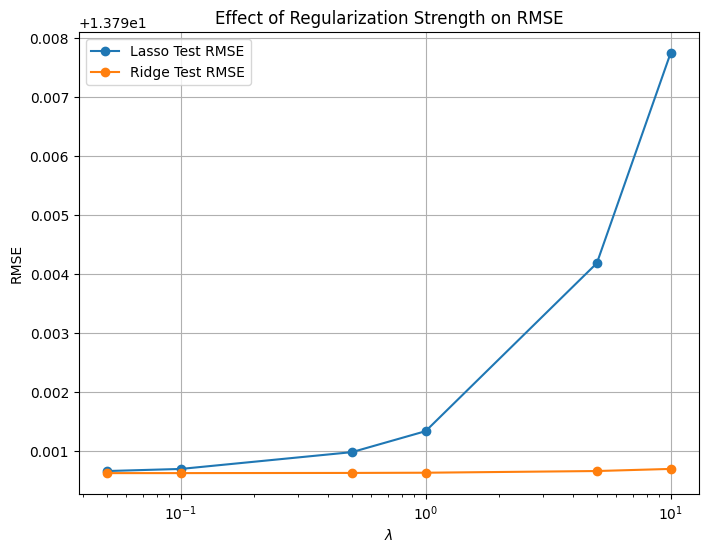

In [108]:
lams = [0.05, 0.1, 0.5, 1, 5, 10]
RMSE_L1 = np.zeros_like(lams)
RMSE_L2 = np.zeros_like(lams)
#TODO: train the model using required regularization and plot the RMSE
for i, lam in enumerate(lams):
  model = PolynomialRegressorGD(degree = 11, lam = lam, reg_type= 'L1')
  model.fit(X_train,y_train)
  yhat = model.predict(X_test)
  RMSE_L1[i] = np.sqrt(mean_squared_error(y_test, yhat))

for i, lam in enumerate(lams):
  model = PolynomialRegressorGD(degree = 11, lam = lam, reg_type= 'L2')
  model.fit(X_train,y_train)
  yhat = model.predict(X_test)
  RMSE_L2[i] = np.sqrt(mean_squared_error(y_test, yhat))

plt.figure(figsize=(8, 6))
plt.plot(lams, RMSE_L1, label="Lasso Test RMSE", marker='o')
plt.plot(lams, RMSE_L2, label="Ridge Test RMSE", marker='o')
plt.xscale("log")
plt.xlabel(r'$\lambda$')
plt.ylabel("RMSE")
plt.title("Effect of Regularization Strength on RMSE")
plt.legend()
plt.grid()
plt.show()

**Can you explain the behaviour of RMSE for both ridge and lasso regularization?**

**Ans:** Inferring from the graph, Lasso is more sensitive to large λ values due to its feature selection property. On the other hand, Ridge has maintained a consistent RMSE across different λ values because it retains all features, albeit with reduced impact.

Generate a new sample dataset using the following formula:

$$
y = 2 \sin\left(\frac{\pi}{2} x\right) + \frac{1}{2} ϵ \quad , \quad x \in [-4, 4]
$$

where $ ϵ $ represents noise sampled from a $\mathcal{N}(0, 1) $ distribution. Plot the fitted polynomial with degrees ranging from 4 to 12 as well as the RMSE:


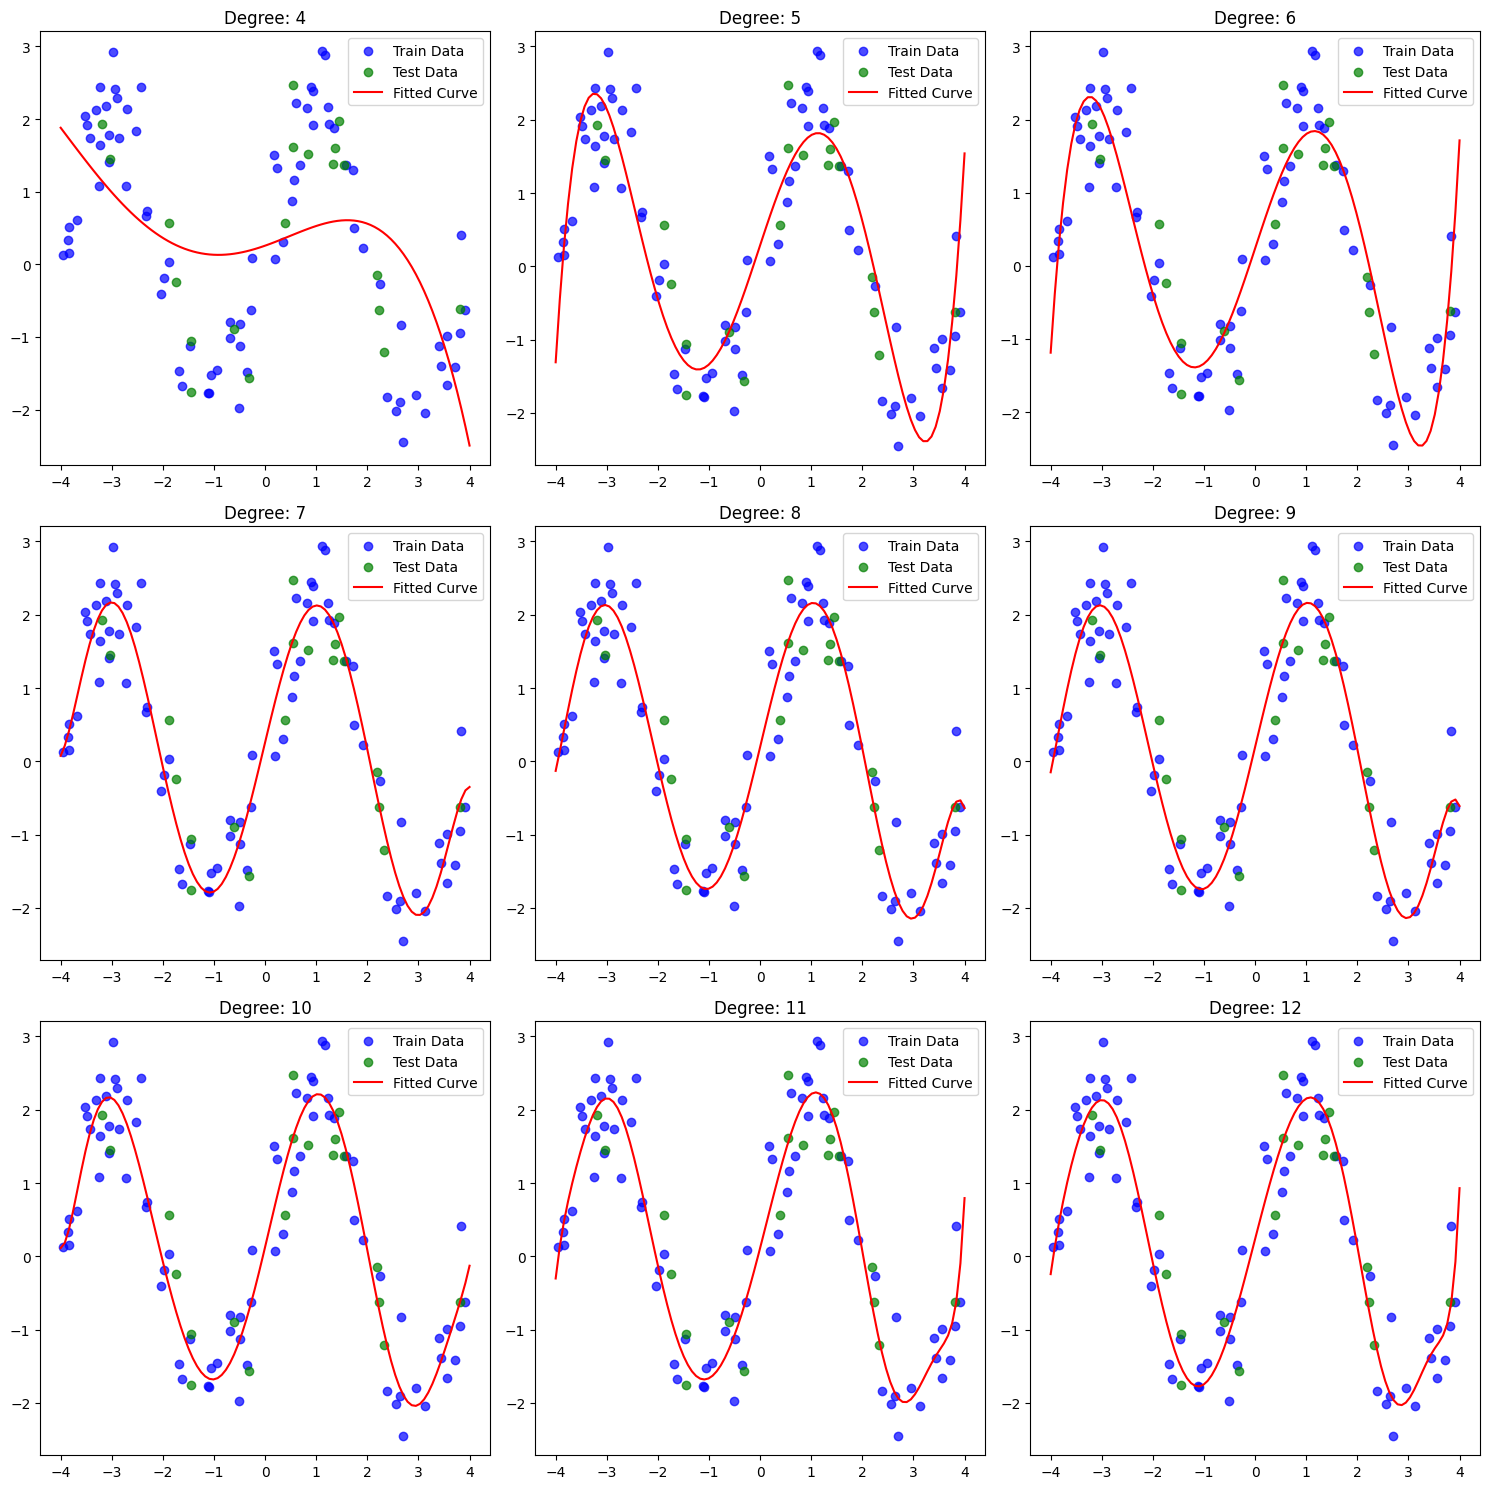

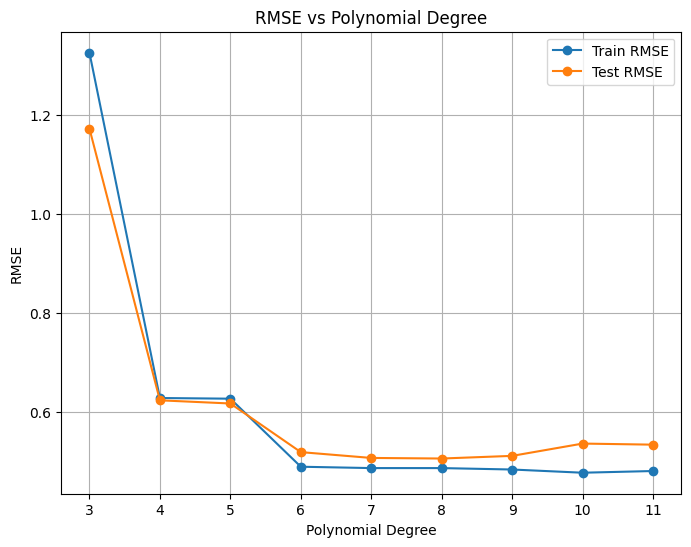

In [109]:
np.random.seed(0)
samples = 100
X = np.random.uniform(-4, 4, 100)
y = 2 * np.sin(np.pi/2 * X) + 0.5 * np.random.normal(0, 1, size = samples)
y = y.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#TODO: train polynomial regression and visualize the RMSE
RMSE_train = np.zeros(9)
RMSE_test = np.zeros(9)
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.ravel()

for i in range(4, 13):
  model = PolynomialRegressor(degree = i)
  model.fit(X_train,y_train)
  yhat_train = model.predict(X_train)
  yhat_test = model.predict(X_test)
  RMSE_train[i-4] = np.sqrt(mean_squared_error(y_train, yhat_train))
  RMSE_test[i-4] = np.sqrt(mean_squared_error(y_test, yhat_test))

  x_range = np.linspace(-4, 4, 100).reshape(-1, 1)
  y_range = model.predict(x_range)
  axs[i-4].scatter(X_train, y_train, color="blue", alpha=0.7, label="Train Data")
  axs[i-4].scatter(X_test, y_test, color="green", alpha=0.7, label="Test Data")
  axs[i-4].plot(x_range, y_range, color="red", label="Fitted Curve")
  axs[i-4].set_title(f"Degree: {i}")
  axs[i-4].legend()

fig.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
degrees = np.arange(3, 12)
plt.plot(degrees, RMSE_train, label="Train RMSE", marker='o')
plt.plot(degrees, RMSE_test, label="Test RMSE", marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.title("RMSE vs Polynomial Degree")
plt.legend()
plt.grid()
plt.show()

**Does this RMSE plot confirm your previous knowledge of the bias-variance tradeoff?**

**Ans:** Initially, RMSE decreases as the polynomial degree increases, indicating a reduction in bias as the model becomes more capable of capturing the complexity in the data. However, after a certain point, RMSE stabilizes when it is expected to increase.


**Could you explain what is the reason behind the change in behavior of RMSE after some degree? (Hint: you may look at the interval chosen)**

**Ans:** The chosen interval limits the relationship between the input data and output. Within this range, lower-degree polynomials already approximate the data well, and increasing the degree further has minimal impact, leading to stable RMSE values.


Using the previously created sample dataset, fit a polynomial regression model of degree 11. Test the RMSE of the model with regularization parameter values $ \{0.05, 0.1, 0.5, 1, 5, 10\} $.  

Plot the results to visualize the effect of $ \lambda $ on model performance.  


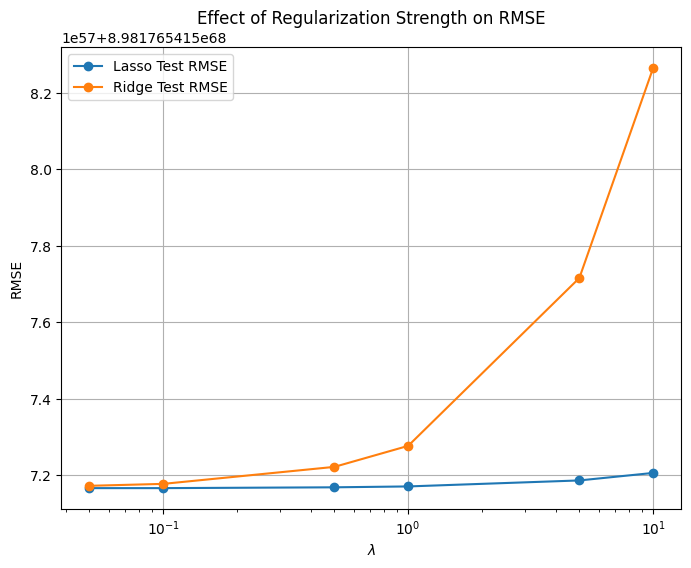

In [110]:
lams = [0.05, 0.1, 0.5, 1, 5, 10]
RMSE_L1 = np.zeros_like(lams)
RMSE_L2 = np.zeros_like(lams)
#TODO: train the model using required regularization and plot the RMSE
for i, lam in enumerate(lams):
  model = PolynomialRegressorGD(degree = 11, lam = lam, reg_type= 'L1')
  model.fit(X_train,y_train)
  yhat = model.predict(X_test)
  RMSE_L1[i] = np.sqrt(mean_squared_error(y_test, yhat))

for i, lam in enumerate(lams):
  model = PolynomialRegressorGD(degree = 11, lam = lam, reg_type= 'L2')
  model.fit(X_train,y_train)
  yhat = model.predict(X_test)
  RMSE_L2[i] = np.sqrt(mean_squared_error(y_test, yhat))

plt.figure(figsize=(8, 6))
plt.plot(lams, RMSE_L1, label="Lasso Test RMSE", marker='o')
plt.plot(lams, RMSE_L2, label="Ridge Test RMSE", marker='o')
plt.xscale("log")
plt.xlabel(r'$\lambda$')
plt.ylabel("RMSE")
plt.title("Effect of Regularization Strength on RMSE")
plt.legend()
plt.grid()
plt.show()

**Can you explain the behaviour of RMSE for both ridge and lasso regularization?**

**Ans:** The RMSE for Ridge remains relatively stable for small λ values but increases significantly as λ grows larger unlike Lasso which has remained stable.

**What is the main difference between this section and the last section?**

**Ans:** Ridge is more sensitive here because its uniform penalization dampens coefficients crucial for capturing the periodic nature of the sinusoidal function, leading to underfitting at large λ values.

## Poissson Regression (40 points)

Poisson regression is a type of Generalized Linear Model (GLM) used for modeling count data and event occurrence rates. It assumes that the response variable $y$ follows a Poisson distribution and models the logarithm of the expected value of $y$ as a linear function of the predictors.

### Characteristics
- **Response Variable**: Count data (non-negative integers).
- **Link Function**: Logarithm function.
- **Assumption**: The mean and variance of the response variable are equal (although this can be relaxed in quasi-Poisson models).

### Model Definition
The Poisson regression model can be written as:
$y_i \sim \text{Poisson}(\mu_i)$

where $y_i$ is the observed count for the $i_{th}$ observation, and $\mu_i$ is the expected value of $y_i$.

The relationship between the predictors and $\mu_i$ is expressed as:
$\log(\mu_i) = \mathbf{x}_i^\top \boldsymbol{\beta}$

where:
- $\mathbf{x}_i = [x_{i1}, x_{i2}, \ldots, x_{ip}]^\top$: The vector of predictors for the $i_th$ observation.
- $\boldsymbol{\beta} = [\beta_0, \beta_1, \ldots, \beta_p]^\top$: The vector of coefficients.

Alternatively, in terms of $\mu_i = \exp(\mathbf{x}_i^\top \boldsymbol{\beta})$

### Log-Likelihood Function
The log-likelihood function for Poisson regression is:

$$\ell(\boldsymbol{\beta}) = \sum_{i=1}^n \left[ y_i \log(\mu_i) - \mu_i - \log(y_i!) \right]$$
where $\mu_i = \exp(\mathbf{x}_i^\top \boldsymbol{\beta})$.

### Gradient (Score Function)
The gradient of the log-likelihood with respect to $\beta$ is:
$\frac{\partial \ell}{\partial \boldsymbol{\beta}} = \sum_{i=1}^n \mathbf{x}_i (y_i - \mu_i)$

### Now, write your Poisson Regression class (10 points)

In [207]:
class PoissonRegression:
    def __init__(self, learning_rate=0.001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.beta = None  # Initialize coefficients

    def _log_likelihood(self, X, y):
        """
        Calculate the log-likelihood for Poisson regression.
        """
        mu = np.exp(X @ self.beta)
        return np.sum(y * np.log(mu) - mu)

    def _gradient_descent(self, X, y):
        """
        Perform gradient descent to update the coefficients.
        """
        mu = np.exp(X @ self.beta)
        gradient = X.T @ (y - mu)
        self.beta += self.learning_rate * gradient

    def fit(self, X, y):
        """
        Fit the Poisson regression model using gradient descent.
        """
        # Add an intercept term to X
        X = np.c_[np.ones(X.shape[0]), X]
        self.beta = np.zeros(X.shape[1])

        for epoch in range(self.epochs):
            self._gradient_descent(X, y)
            if epoch % 100 == 0:
                log_likelihood = self._log_likelihood(X, y)
                print(f'Epoch {epoch}, Log-Likelihood: {log_likelihood}')

    def predict(self, x):
        """
        Predict the response variable for given input features.
        """
        x = np.c_[np.ones(x.shape[0]), x]
        return np.exp(x @ self.beta)

### Generate Dataset (10 points)
Generate poisson data using numpy.

In [208]:
np.random.seed(42)
b0 = 1
b1 = 0.15
# poisson data
X = np.random.rand(samples)
mu = np.exp(b0 + b1 * X)
y = np.random.poisson(mu).flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

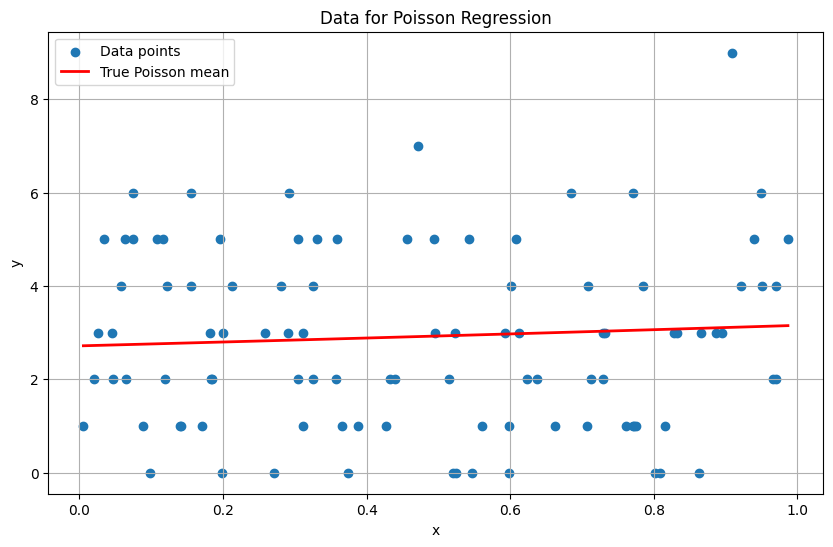

In [209]:
# plot the poisson mean value and the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X, y, label='Data points')
x_range = np.linspace(min(X), max(X), 100)
mu_true = np.exp(b0 + b1 * x_range)
ax.plot(x_range, mu_true, color='red', linewidth=2, label='True Poisson mean')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Data for Poisson Regression')
ax.grid(True)
ax.legend()
plt.show()

### Fit poisson regression on data and plot the predicted poisson regression (10 points)

In [212]:
# fit your poisson regression model
model = PoissonRegression()
model.fit(X, y)
predictions = model.predict(X)

Epoch 0, Log-Likelihood: -61.831782120440664
Epoch 100, Log-Likelihood: 11.357171927619287
Epoch 200, Log-Likelihood: 11.397662087277284
Epoch 300, Log-Likelihood: 11.398373859331347
Epoch 400, Log-Likelihood: 11.398386315310535
Epoch 500, Log-Likelihood: 11.39838653316229
Epoch 600, Log-Likelihood: 11.398386536972167
Epoch 700, Log-Likelihood: 11.398386537038792
Epoch 800, Log-Likelihood: 11.398386537039954
Epoch 900, Log-Likelihood: 11.398386537039976


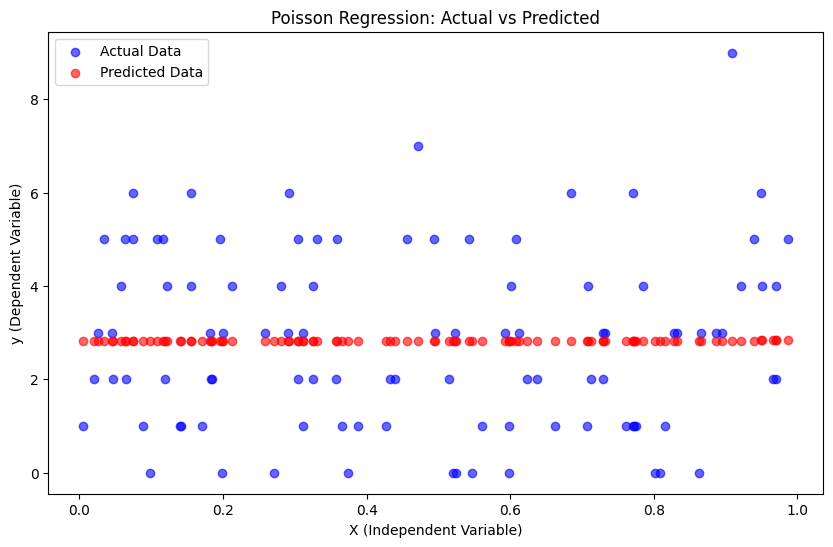

In [213]:
# plot the prediction
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
plt.scatter(X, predictions, color='red', label='Predicted Data', alpha=0.6)
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.title('Poisson Regression: Actual vs Predicted')
plt.legend()
plt.show()

### Use different learning rate and plot your prediction (10 points)

In [214]:
# TODO
model = PoissonRegression(learning_rate = 0.01)
model.fit(X, y)
predictions = model.predict(X)

Epoch 0, Log-Likelihood: -332.91943718315406
Epoch 100, Log-Likelihood: -1109.017351161425
Epoch 200, Log-Likelihood: -520.5084405884329
Epoch 300, Log-Likelihood: -1460.4146817345588
Epoch 400, Log-Likelihood: -170.886205790793
Epoch 500, Log-Likelihood: -482.5384123782167
Epoch 600, Log-Likelihood: -924.3327417609937
Epoch 700, Log-Likelihood: -7.056915020008827
Epoch 800, Log-Likelihood: -1675.3864136420557
Epoch 900, Log-Likelihood: -55.66997678175011


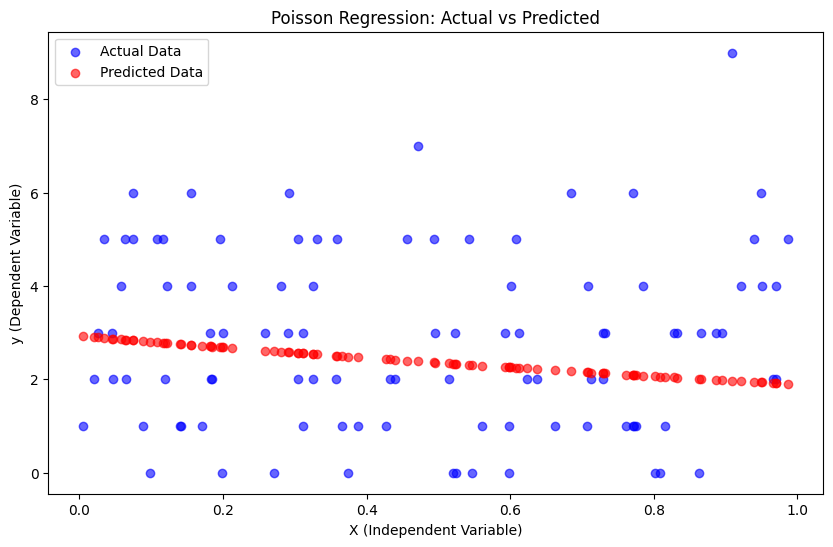

In [217]:
# plot the prediction
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
plt.scatter(X, predictions, color='red', label='Predicted Data', alpha=0.6)
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.title('Poisson Regression: Actual vs Predicted')
plt.legend()
plt.show()